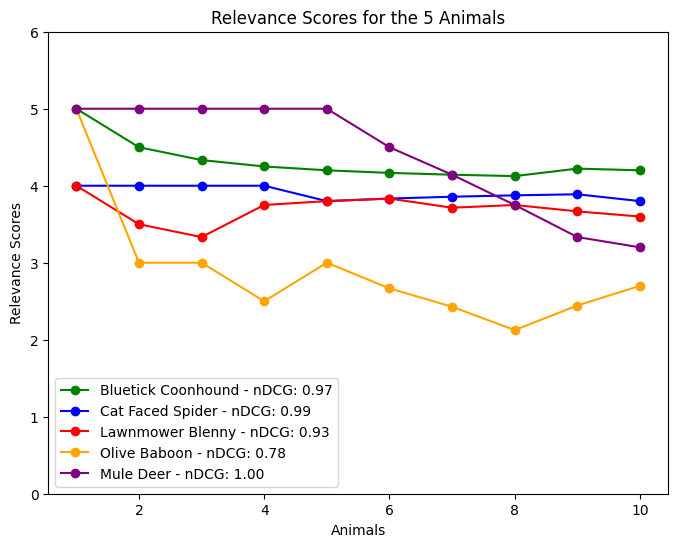

0.6956940443813076


In [15]:
import matplotlib.pyplot as plt
import math as Math

def calculate_dcg(relevance_scores):
    dcg = 0
    for i in range(len(relevance_scores)):
        if i == 0:
            dcg += relevance_scores[i]
        else:
            dcg += relevance_scores[i] / Math.log2(i + 1)
    return dcg


def calculate_dcg2(relevance_scores):
    dcg = 0
    for i in range(len(relevance_scores)):
        dcg += relevance_scores[i] / (2 ** (i + 1) - 1)
    return dcg

def calculate_ndcg(relevance_scores):
    sorted_scores = sorted(relevance_scores, reverse=True)
    ideal_dcg = calculate_dcg(sorted_scores)
    actual_dcg = calculate_dcg(relevance_scores)
    ndcg = actual_dcg / ideal_dcg if ideal_dcg != 0 else 0
    return ndcg

def average_at_list(relevance_scores):
    return [sum(relevance_scores[:i]) / i for i in range(1, len(relevance_scores) + 1)]

# Example data
relevance_scores_1 = [5,4,4,4,4,4,4,4,5,4]
relevance_scores_2 = [4,4,4,4,3,4,4,4,4,3]
relevance_scores_3 = [4,3,3,5,4,4,3,4,3,3]
relevance_scores_4 = [5,1,3,1,5,1,1,0,5,5]
relevance_scores_5 = [5,5,5,5,5,2,2,1,0,2]

# Calculate nDCG
ndcg1 = calculate_ndcg(relevance_scores_1)
ndcg2 = calculate_ndcg(relevance_scores_2)
ndcg3 = calculate_ndcg(relevance_scores_3)
ndcg4 = calculate_ndcg(relevance_scores_4)
ndcg5 = calculate_ndcg(relevance_scores_5)

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), average_at_list(relevance_scores_1), marker='o', linestyle='-', color='green', label=f'Bluetick Coonhound - nDCG: {ndcg1:.2f}')
plt.plot(range(1,11), average_at_list(relevance_scores_2), marker='o', linestyle='-', color='blue', label=f'Cat Faced Spider - nDCG: {ndcg2:.2f}')
plt.plot(range(1,11), average_at_list(relevance_scores_3), marker='o', linestyle='-', color='red', label=f'Lawnmower Blenny - nDCG: {ndcg3:.2f}')
plt.plot(range(1,11), average_at_list(relevance_scores_4), marker='o', linestyle='-', color='orange', label=f'Olive Baboon - nDCG: {ndcg4:.2f}')
plt.plot(range(1,11), average_at_list(relevance_scores_5), marker='o', linestyle='-', color='purple', label=f'Mule Deer - nDCG: {ndcg5:.2f}')


plt.title(f'Relevance Scores for the 5 Animals')
plt.xlabel('Animals')
plt.ylabel('Relevance Scores')
plt.ylim(0, 6)  # Set y-axis limit based on your relevance scale
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import ndcg_score
# we have groud-truth relevance of some answers to a query:
true_relevance = np.asarray([[10, 0, 0, 1, 5]])
# we predict some scores (relevance) for the answers
scores = np.asarray([[.1, .2, .3, 4, 70]])
print(ndcg_score(true_relevance, scores))
